In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import dataset
df = pd.read_csv('datasets/Spotify_YoutubeClean.csv')
# make id column the index
df.set_index('id', inplace=True)
df.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,Popularity Score,Popularity
id,,,,,,,,,,,,,,,,,,,,,
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09,0.111492,Very popular
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08,0.017547,Popular
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07,0.004202,Regular
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08,0.032514,Very popular
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08,0.108380,Very popular


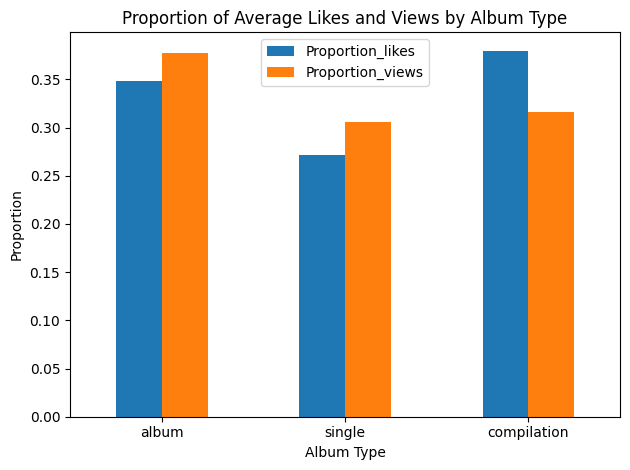

In [3]:
# Get unique album types
unique_album_type = df['Album_type'].unique()

# Get average likes and views per album type
album_type_likes = df.groupby('Album_type')['Likes'].mean()
album_type_views = df.groupby('Album_type')['Views'].mean()

# Create a new df with the average likes and views per album type
album_type_data = {
        'Album Type': unique_album_type,
        'Average Likes': album_type_likes.values,
        'Average Views': album_type_views.values
    }

album_type_df = pd.DataFrame(album_type_data
)
                             
# Set the Album_type column as the index
album_type_df.set_index('Album Type', inplace=True)

# Calculate the proportions of average likes and views
total_likes = album_type_df['Average Likes'].sum()
total_views = album_type_df['Average Views'].sum()
album_type_df['Proportion_likes'] = album_type_df['Average Likes'] / total_likes
album_type_df['Proportion_views'] = album_type_df['Average Views'] / total_views               


# Create the bar plot
ax = album_type_df[['Proportion_likes', 'Proportion_views']].plot(kind='bar', rot=0)

# Set the axis labels and title
ax.set_xlabel('Album Type')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Average Likes and Views by Album Type')

# Display the plot
plt.tight_layout()
plt.show()

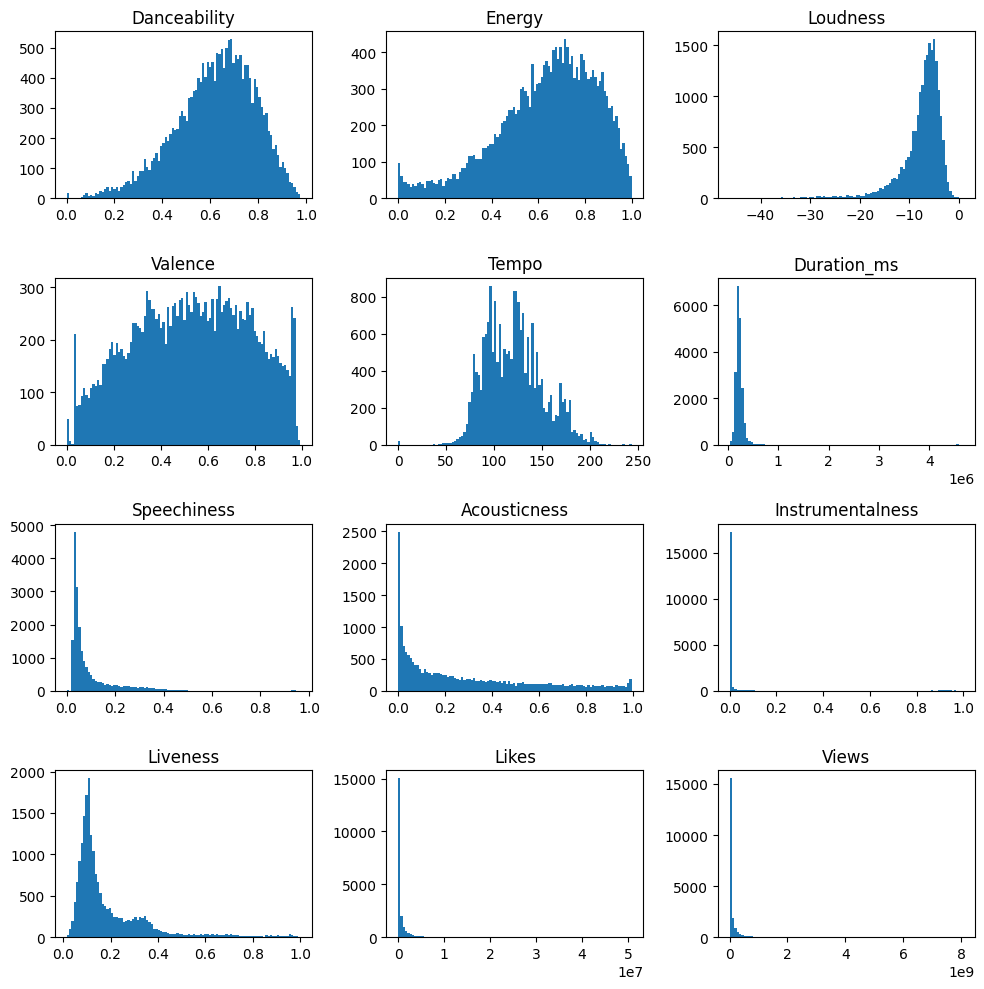

In [20]:
# Histograms

numeric_cols = ['Danceability', 'Energy', 'Loudness', 'Valence', 'Tempo', 'Duration_ms', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Likes', 'Views']

# Create the histograms
plt.figure(figsize=(10, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i+1)
    plt.hist(df[col], bins=100)
    plt.title(col)

plt.subplots_adjust(hspace=0.5)  # Adjust the spacing between subplots
plt.tight_layout()  # Automatically adjusts the padding between subplots

plt.show()

In [23]:
# Some descriptive statistics

statistics = df[['Likes', 'Views']].describe()

statistics.T

,count,mean,std,min,25%,50%,75%,max
Likes,20177.0,6.633411e+05,1.789324e+06,0.0,21581.0,124481.0,522148.0,5.078865e+07
Views,20177.0,9.418910e+07,2.750801e+08,0.0,1835998.0,14542507.0,70572997.0,8.079649e+09


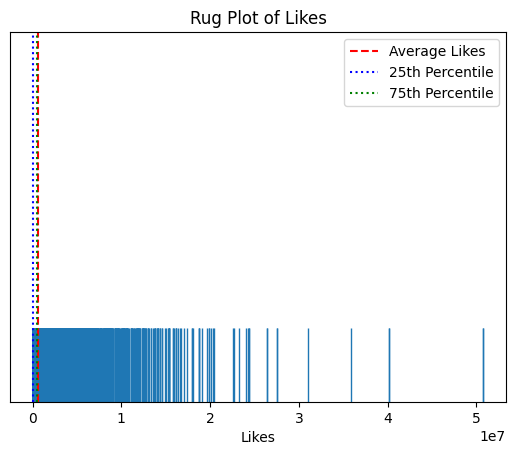

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

likes = df['Likes']

# Calculate summary statistics
average_likes = np.mean(likes)
q1 = np.percentile(likes, 25)
q3 = np.percentile(likes, 75)

# Create the plot
fig, ax = plt.subplots()
sns.rugplot(likes, height=0.2, ax=ax)
ax.axvline(average_likes, color='r', linestyle='--', label='Average Likes')
ax.axvline(q1, color='b', linestyle=':', label='25th Percentile')
ax.axvline(q3, color='g', linestyle=':', label='75th Percentile')
ax.set_xlabel('Likes')
ax.set_title('Rug Plot of Likes')

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_ylabel('')

# Add a legend
ax.legend()

# Display the plot
plt.show()

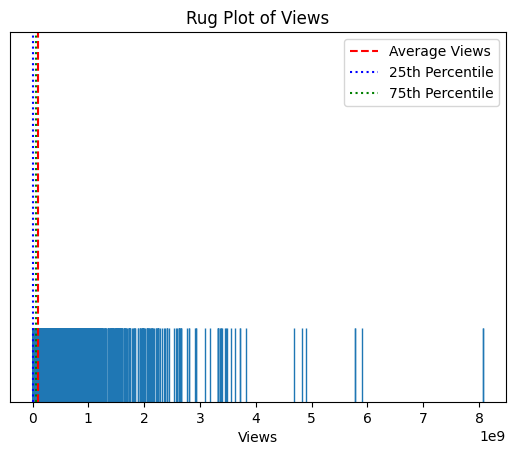

In [30]:
views = df['Views']

# Calculate summary statistics
average_views = np.mean(views)
q1 = np.percentile(views, 25)
q3 = np.percentile(views, 75)

# Create the plot
fig, ax = plt.subplots()
sns.rugplot(views, height=0.2, ax=ax)
ax.axvline(average_views, color='r', linestyle='--', label='Average Views')
ax.axvline(q1, color='b', linestyle=':', label='25th Percentile')
ax.axvline(q3, color='g', linestyle=':', label='75th Percentile')
ax.set_xlabel('Views')
ax.set_title('Rug Plot of Views')

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_ylabel('')

# Add a legend
ax.legend()

# Display the plot
plt.show()

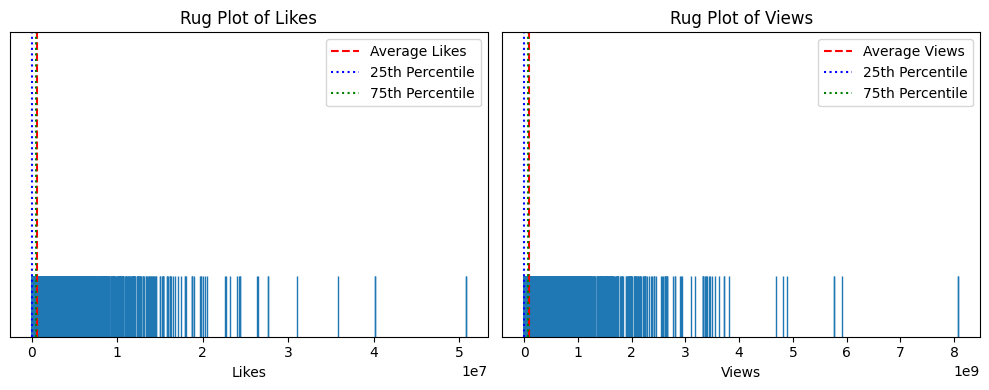

In [31]:
likes = df['Likes']
views = df['Views']

# Calculate summary statistics for Likes
average_likes = np.mean(likes)
q1_likes = np.percentile(likes, 25)
q3_likes = np.percentile(likes, 75)

# Calculate summary statistics for Views
average_views = np.mean(views)
q1_views = np.percentile(views, 25)
q3_views = np.percentile(views, 75)

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Likes Rug Plot
sns.rugplot(likes, height=0.2, ax=ax1)
ax1.axvline(average_likes, color='r', linestyle='--', label='Average Likes')
ax1.axvline(q1_likes, color='b', linestyle=':', label='25th Percentile')
ax1.axvline(q3_likes, color='g', linestyle=':', label='75th Percentile')
ax1.set_xlabel('Likes')
ax1.set_title('Rug Plot of Likes')
ax1.set_yticks([])
ax1.set_ylabel('')
ax1.legend()

# Views Rug Plot
sns.rugplot(views, height=0.2, ax=ax2)
ax2.axvline(average_views, color='r', linestyle='--', label='Average Views')
ax2.axvline(q1_views, color='b', linestyle=':', label='25th Percentile')
ax2.axvline(q3_views, color='g', linestyle=':', label='75th Percentile')
ax2.set_xlabel('Views')
ax2.set_title('Rug Plot of Views')
ax2.set_yticks([])
ax2.set_ylabel('')
ax2.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()